# Demand - Capacities - Investment and Emissions Categories AR6 IPCC

The purpose of this file is to plot the data of the IPCC assessed scenarios 

AR6 Dataset

Source:
https://data.ene.iiasa.ac.at/ar6/#/login

Work is done on the data **"demand_emissions_cat_merged_24August2022.csv"**



Date **24 August 2022**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 


c:\Users\M.Amer\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
demand = pd.read_csv('AR6_Scenarios_Database_World_v1.0_selected_excel.csv')

emissions_cat = pd.read_excel('merging_categories_emissions.xlsx')


In [23]:
demand.head()

,Model,Scenario,Region,Variable,Unit,2000,2010,2020,2021,2040,2050,2100
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|CH4,Mt CH4/yr,NaN,NaN,392.249362,360.368309,135.139281,107.634545,133.587200
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|CO2,Mt CO2/yr,NaN,NaN,41875.996010,39261.052720,3597.338938,-2121.743123,-9471.112148
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|F-G...,Mt CO2/yr,NaN,NaN,1473.847279,1355.234709,163.083745,147.381708,164.979770
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Capacity|Electricity|Biomass,GW,NaN,58.8100,59.796600,NaN,962.315200,1608.865900,3317.977200
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Capacity|Electricity|Coal,GW,NaN,1516.7495,1889.504200,NaN,155.257600,153.763200,480.515000


In [24]:
emissions_cat.head()

,Model,Scenario,Category,Category_name
0,AIM/CGE 2.0,SSP1-26,C3,C3: limit warming to 2°C (>67%)
1,AIM/CGE 2.0,SSP1-34,C5,C5: limit warming to 2.5°C (>50%)
2,AIM/CGE 2.0,SSP1-45,C6,C6: limit warming to 3°C (>50%)
3,AIM/CGE 2.0,SSP1-Baseline,C7,C7: limit warming to 4°C (>50%)
4,AIM/CGE 2.0,SSP4-26,C3,C3: limit warming to 2°C (>67%)


In [25]:
result = pd.merge(demand, emissions_cat, how="left", on=["Model", "Scenario"])

In [26]:
result.head()

,Model,Scenario,Region,Variable,Unit,2000,2010,2020,2021,2040,2050,2100,Category,Category_name
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|CH4,Mt CH4/yr,NaN,NaN,392.249362,360.368309,135.139281,107.634545,133.587200,NaN,NaN
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|CO2,Mt CO2/yr,NaN,NaN,41875.996010,39261.052720,3597.338938,-2121.743123,-9471.112148,NaN,NaN
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|F-G...,Mt CO2/yr,NaN,NaN,1473.847279,1355.234709,163.083745,147.381708,164.979770,NaN,NaN
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Capacity|Electricity|Biomass,GW,NaN,58.8100,59.796600,NaN,962.315200,1608.865900,3317.977200,NaN,NaN
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Capacity|Electricity|Coal,GW,NaN,1516.7495,1889.504200,NaN,155.257600,153.763200,480.515000,NaN,NaN


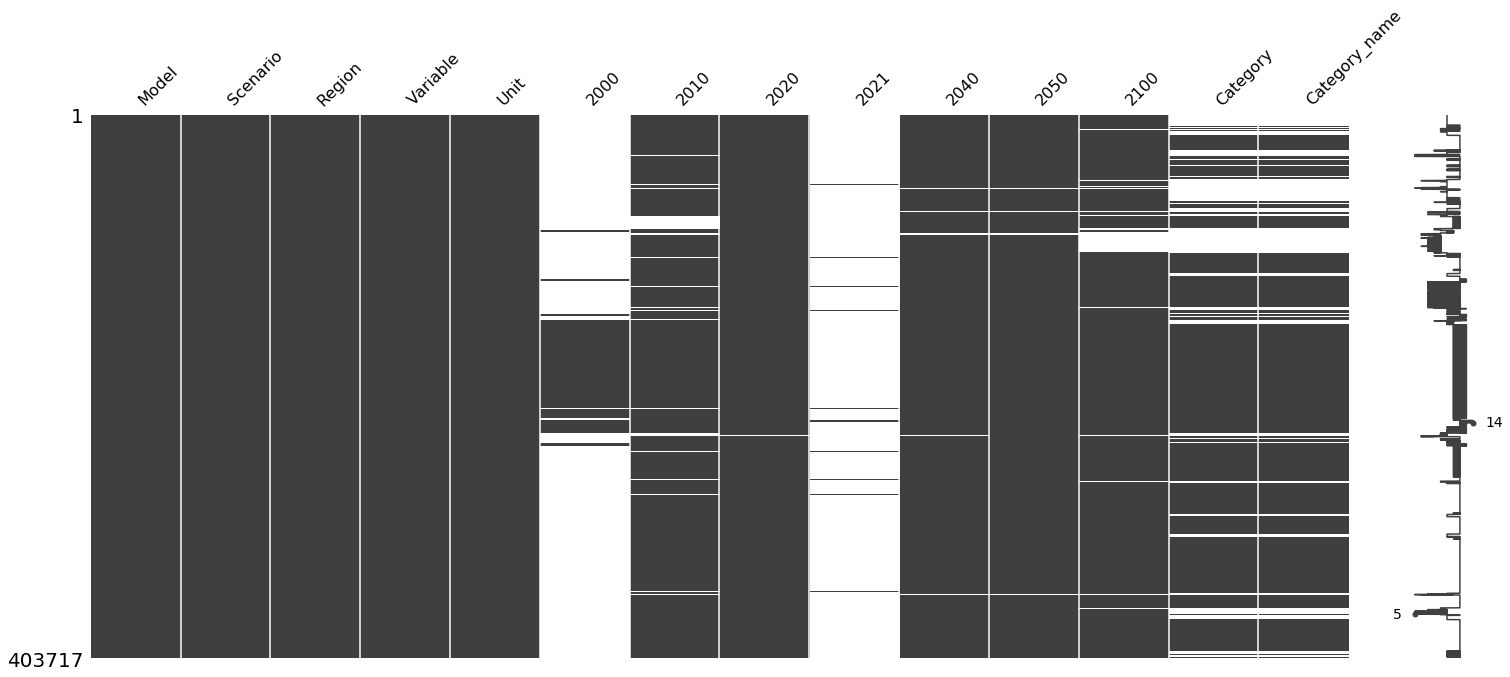

In [27]:
import missingno as msno
msno.matrix(result)

In [35]:
# clean the result dataframe by dropping columns with many empty cells

result_c = result.drop(columns=['2021','2000', '2100', '2010', 'Category_name' ])

In [36]:
result_c.head()

,Model,Scenario,Region,Variable,Unit,2020,2040,2050,Category
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|CH4,Mt CH4/yr,392.249362,135.139281,107.634545,NaN
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|CO2,Mt CO2/yr,41875.996010,3597.338938,-2121.743123,NaN
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|F-G...,Mt CO2/yr,1473.847279,163.083745,147.381708,NaN
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Capacity|Electricity|Biomass,GW,59.796600,962.315200,1608.865900,NaN
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Capacity|Electricity|Coal,GW,1889.504200,155.257600,153.763200,NaN


In [37]:
# check the number of empty values 
result_c.isnull().sum()

Model           0
Scenario        0
Region          0
Variable        0
Unit            0
2020         1786
2040         3762
2050         3286
Category    89087
dtype: int64

In [39]:
# dropna
results_clean = result_c.dropna()

In [41]:
results_clean.shape

(314519, 9)

In [13]:
#read the dataframe 
ipcc = pd.read_csv('demand_emissions_cat_merged_24August2022.csv')

In [4]:
ipcc.head()

,Unnamed: 0,Model,Scenario,Region,Variable,Unit,2019,2020,2021,2022,...,2093,2094,2095,2096,2097,2098,2099,2100,Category,Category_name
0,0,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,8.130643,7.738276,7.503108,7.269501,...,2.022680,2.007340,1.992000,1.976660,1.961320,1.945980,1.930640,1.915300,C3,C3: limit warming to 2°C (>67%)
1,1,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,382.198514,380.730719,365.470232,350.213054,...,117.482740,116.862420,116.242100,115.621780,115.001460,114.381140,113.760820,113.140500,C3,C3: limit warming to 2°C (>67%)
2,2,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,855.912547,836.364378,821.034217,805.723117,...,347.671325,344.756572,341.845444,338.937940,336.034060,333.133803,330.237171,327.344163,C3,C3: limit warming to 2°C (>67%)
3,3,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,37800.549767,37462.666746,36683.892311,35905.865479,...,-188.421413,-238.245789,-288.070164,-337.894539,-387.718914,-437.543289,-487.367665,-537.192040,C3,C3: limit warming to 2°C (>67%)
4,4,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,2439.280541,2169.740677,1878.426691,1587.112706,...,-3480.564713,-3471.886089,-3463.207464,-3454.528839,-3445.850214,-3437.171589,-3428.492965,-3419.814340,C3,C3: limit warming to 2°C (>67%)


In [5]:
ipcc['Region'].value_counts()

World    23411
Name: Region, dtype: int64

The data has information on the world only - no regional analysis 

In [6]:
# get a list of energy variables 

energy_variables = ['Primary Energy', 'Primary Energy|Nuclear', 'Primary Energy|Oil', 'Primary Energy|Coal', 'Primary Energy|Gas', 'Primary Energy|Hydro', 'Primary Energy|Wind', 'Primary Energy|Solar']

In [7]:
ipcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23411 entries, 0 to 23410
Data columns (total 90 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     23411 non-null  int64  
 1   Model          23411 non-null  object 
 2   Scenario       23411 non-null  object 
 3   Region         23411 non-null  object 
 4   Variable       23411 non-null  object 
 5   Unit           23411 non-null  object 
 6   2019           23411 non-null  float64
 7   2020           23411 non-null  float64
 8   2021           23411 non-null  float64
 9   2022           23411 non-null  float64
 10  2023           23411 non-null  float64
 11  2024           23411 non-null  float64
 12  2025           23411 non-null  float64
 13  2026           23411 non-null  float64
 14  2027           23411 non-null  float64
 15  2028           23411 non-null  float64
 16  2029           23411 non-null  float64
 17  2030           23411 non-null  float64
 18  2031  

In [9]:
ipcc.columns

Index(['Unnamed: 0', 'Model', 'Scenario', 'Region', 'Variable', 'Unit', '2019',
       '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028',
       '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037',
       '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046',
       '2047', '2048', '2049', '2050', '2051', '2052', '2053', '2054', '2055',
       '2056', '2057', '2058', '2059', '2060', '2061', '2062', '2063', '2064',
       '2065', '2066', '2067', '2068', '2069', '2070', '2071', '2072', '2073',
       '2074', '2075', '2076', '2077', '2078', '2079', '2080', '2081', '2082',
       '2083', '2084', '2085', '2086', '2087', '2088', '2089', '2090', '2091',
       '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099', '2100',
       'Category', 'Category_name'],
      dtype='object')

Filter the dataframe on 2010,2020,2030,2040,2050,2100, Category, Unit, Model, Scenario

In [8]:
ipcc.shape

(23411, 90)

In [14]:
ipcc = ipcc[['Model', 'Scenario','Variable' ,'Unit', '2020', '2030', '2040', '2050' , '2100']]

In [15]:
ipcc.head()

,Model,Scenario,Variable,Unit,2020,2030,2040,2050,2100
0,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,7.738276,5.456829,4.237396,3.337359,1.915300
1,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,380.730719,228.274770,172.269750,151.312704,113.140500
2,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,836.364378,683.920550,585.632065,499.384203,327.344163
3,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,37462.666746,29708.564518,18913.013818,12965.258478,-537.192040
4,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,2169.740677,-743.399175,-2306.007528,-2857.468480,-3419.814340


In [19]:
# count the number of scenarios 

ipcc.Model.nunique()

49

In [20]:
ipcc.Variable.unique()

array(['AR6 climate diagnostics|Harmonized|Emissions|BC',
       'AR6 climate diagnostics|Harmonized|Emissions|CH4',
       'AR6 climate diagnostics|Harmonized|Emissions|CO',
       'AR6 climate diagnostics|Harmonized|Emissions|CO2',
       'AR6 climate diagnostics|Harmonized|Emissions|CO2|AFOLU',
       'AR6 climate diagnostics|Harmonized|Emissions|CO2|Energy and Industrial Processes',
       'AR6 climate diagnostics|Harmonized|Emissions|F-Gases',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC125',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC134a',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC143a',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC227ea',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC23',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC32',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC43-10',
       'AR6 climate diagnostics|Harmonized|Emissions|N2O',
       'AR6 climate di

In [58]:
ipcc.region.unique()

array(['R10AFRICA', 'R10CHINA+', 'R10EUROPE', 'R10INDIA+', 'R10LATIN_AM',
       'R10NORTH_AM', 'R10PAC_OECD', 'R10REF_ECON', 'R10REST_ASIA',
       'R10ROWO', 'R10MIDDLE_EAST'], dtype=object)

In [72]:
specific_variables = ['Primary Energy|Coal', 'Primary Energy|Gas',
       'Primary Energy|Oil','Primary Energy|Fossil', 'Primary Energy|Solar',
       'Primary Energy|Wind']

#include total energy demand in the list 
specific_variables_ = ['Primary Energy|Coal', 'Primary Energy|Gas',
       'Primary Energy|Oil','Primary Energy|Fossil', 'Primary Energy|Solar',
       'Primary Energy|Wind','Primary Energy']

specific_regions = ['R10AFRICA', 'R10CHINA+', 'R10EUROPE', 'R10INDIA+', 'R10LATIN_AM',
       'R10NORTH_AM', 
       'R10MIDDLE_EAST']

In [66]:
ipcc_s = ipcc[ipcc['variable'].isin(specific_variables)]
ipcc_s_r = ipcc_s[ipcc_s['region'].isin(specific_regions)]

In [73]:
# taking into account tht total primary energy 
ipcc_s_ = ipcc[ipcc['variable'].isin(specific_variables_)]
ipcc_s_r_ = ipcc_s_[ipcc_s_['region'].isin(specific_regions)]

In [25]:
# convert the data to long formate again to make sure the scenarios we have hold all the energy sources of interest
"""
ipcc_final = ipcc.melt(id_vars = ['model','scenario','region'],
                                    value_vars = ['Primary Energy','Primary Energy|Coal','Primary Energy|Fossil','Primary Energy|Gas','Primary Energy|Hydro',	
                                    'Primary Energy|Nuclear','Primary Energy|Oil','Primary Energy|Solar','Primary Energy|Wind'],
                                    var_name = 'Energy Source',
                                    value_name = 'Demand EJ/yr')
"""

## Plotting the outcome of energy scenarioes

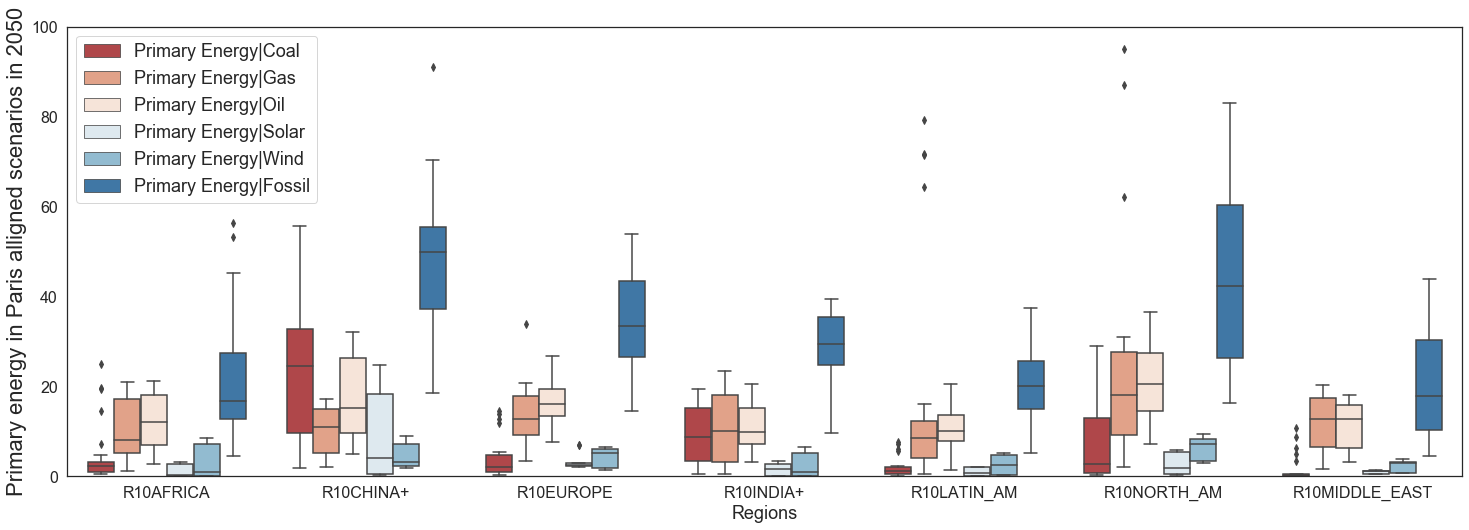

In [70]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(25,8.27)})


# change the background color
sns.set_style("white")

#plot energy data 
sns.boxplot(x='region', y=2050, data=ipcc_s_r, hue = "variable", palette='RdBu')
plt.ylabel('Primary energy in Paris alligned scenarios in 2050', size = 22)
plt.yticks(size = 20)
plt.yticks(size = 16)
plt.ylim(0, 100)

plt.xlabel('Regions', size = 18)
plt.xticks(size = 16);

plt.legend(prop={'size': 18})


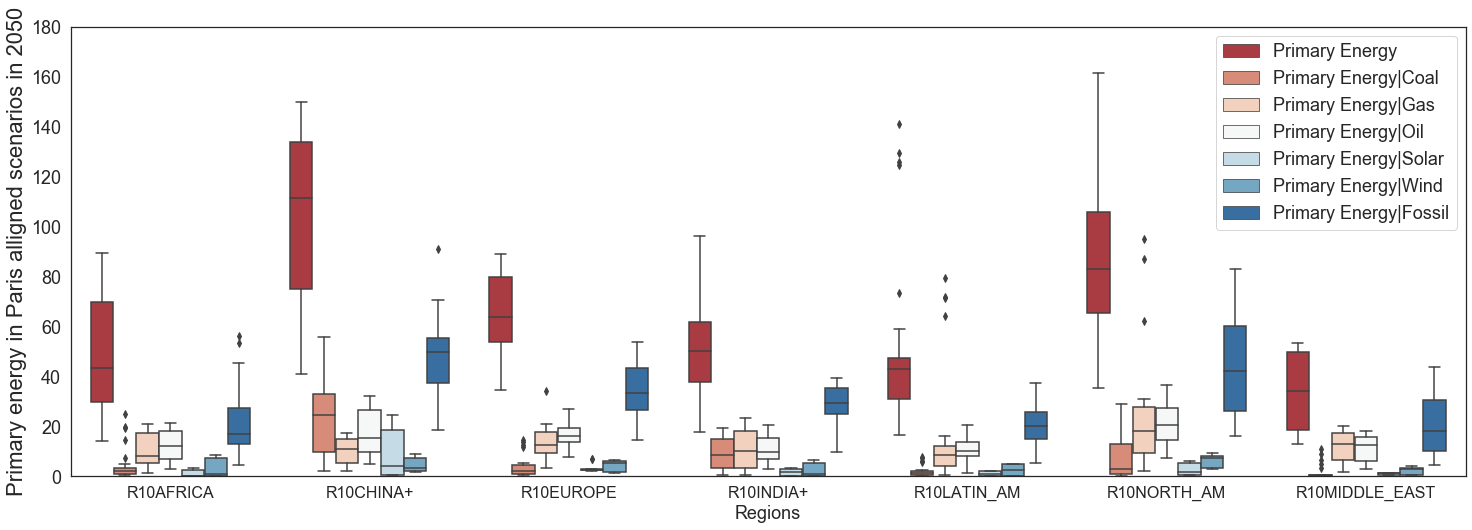

In [78]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(25,8.27)})


# change the background color
sns.set_style("white")

# this plot takes into account total primary energy 

#plot energy data 
sns.boxplot(x='region', y=2050, data=ipcc_s_r_, hue = "variable", palette='RdBu')
plt.ylabel('Primary energy in Paris alligned scenarios in 2050', size = 22)
plt.yticks(size = 20)
plt.yticks(size = 18)
plt.ylim(0, 180)

plt.xlabel('Regions', size = 18)
plt.xticks(size = 16);

plt.legend(prop={'size': 18})


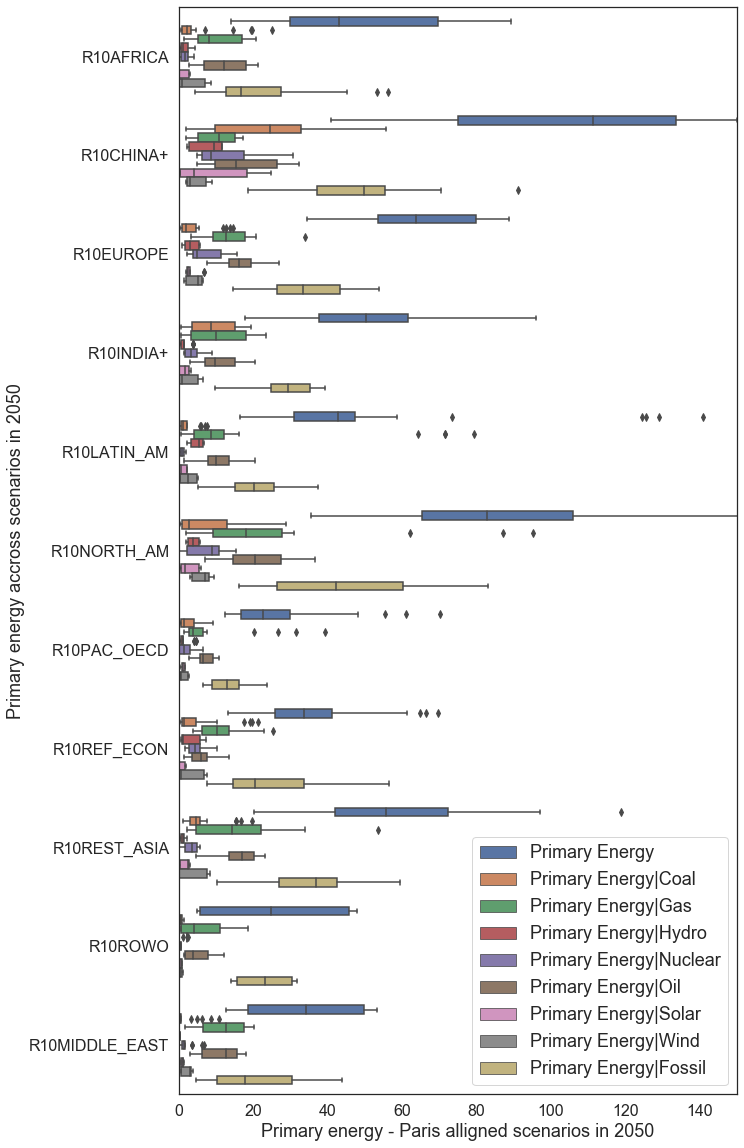

In [42]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(10,20)})


# change the background color
sns.set_style("white")

#plot energy data 
sns.boxplot(y='region', x=2050, data=ipcc, hue = "variable", orient="h")
plt.ylabel('Primary energy accross scenarios in 2050', size = 18)
plt.yticks(size = 16)
plt.yticks(size = 16)
plt.xlim(0, 150)

plt.xlabel('Primary energy - Paris alligned scenarios in 2050', size = 18)
plt.xticks(size = 16);

plt.legend(prop={'size': 18})


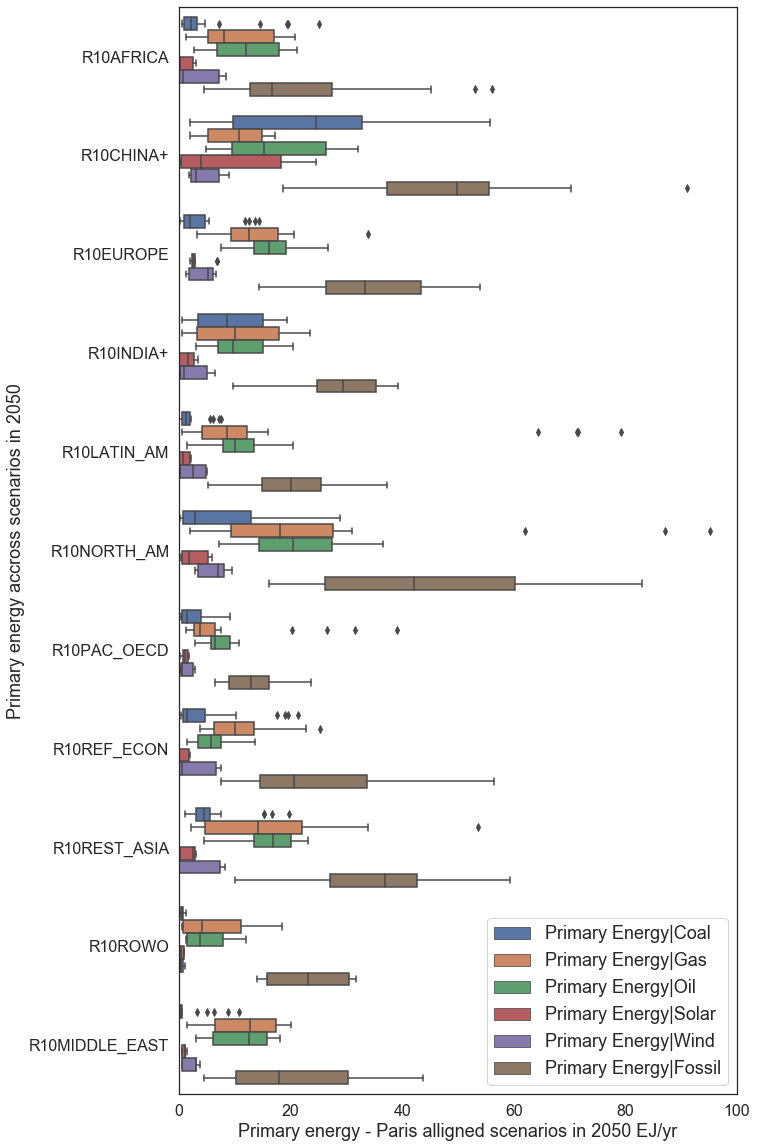

In [52]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(10,20)})


# change the background color
sns.set_style("white")

#plot energy data 
sns.boxplot(y='region', x=2050, data=ipcc_s, hue = "variable", orient="h")
plt.ylabel('Primary energy accross scenarios in 2050', size = 18)
plt.yticks(size = 16)
plt.yticks(size = 16)
plt.xlim(0, 100)

plt.xlabel('Primary energy - Paris alligned scenarios in 2050 EJ/yr', size = 18)
plt.xticks(size = 16);

plt.legend(prop={'size': 18})
